<h1 align = center> <font color = "#88AA00"> Dimensionality Reduction Techniques </h1>


#### What is the dimensionality reduction ?

Dimensionality reduction is the process of reducing the number of features in a dataset while retaining as much of the original information as possible. It can be useful for data visualization, feature engineering, and reducing computational complexity. There are various techniques available for dimensionality reduction, such as Principal Component Analysis (PCA), Linear Discrimant Analysis (LDA) ,t-Distributed Stochastic Neighbor Embedding (t-SNE) , Independent Component Analysis (ICA) , and other techniques available. and feature selection methods like SelectKBest and Recursive Feature Elimination (RFE). To see the impact of these techniques, pick a high-dimensional dataset and observe how the results of a model change when dimensionality reduction is applied. This will help you understand the effectiveness of each technique in improving model performance.

#### What are features Selection Methods ?

Feature selection is the process of selecting the most relevant features (variables) from a dataset for use in machine learning models. It helps improve the accuracy and efficiency of the models by reducing the redundancy and noise in the dataset. It is usually used as a pre-processing step before doing the actual learning. There are various techniques available for feature selection, such as SelectKBest, Recursive Feature Elimination (RFE), and other techniques based on statistical tests or correlation analysis. To see the impact of these techniques, pick a high-dimensional dataset and observe how the results of a model change when feature selection is applied. This will help you understand the effectiveness of each technique in improving model performance.

#### What is Principle Component Analysis (PCA) ?

PCA is an unsupervised linear transformation technique that aims to find the principal components (or directions) in the feature space that capture the most variance in the data. The principal components are orthogonal, meaning they are uncorrelated, and they are ordered in descending order of their explained variance. By projecting the original data onto the principal components, PCA reduces the dimensionality of the dataset while preserving as much information as possible.

#### What is Linear Discriminant Analysis (LDA) ?

LDA is a supervised classification technique that aims to find the linear discriminants (or directions) in the feature space that maximize the separation between the classes. The discriminants are orthogonal, meaning they are uncorrelated, and they are ordered in descending order of their explained variance. By projecting the original data onto the discriminants, LDA reduces the dimensionality of the dataset while maintaining as much class separation as possible.

#### What is t-Distributed Stochastic Neighbor Embedding (t-SNE) ?

t-SNE is a non-linear dimensionality reduction technique that aims to preserve the local structure and relationships in the data while reducing the dimensionality. The algorithm uses a probabilistic model to estimate the similarity between data points in the high-dimensional space and project them onto a lower-dimensional space using t-distributions. t-SNE helps visualize high-dimensional data and can be used for data visualization, clustering, and exploratory data analysis.

#### What is Independent Component Analysis (ICA) ?

ICA is a non-linear dimensionality reduction technique that aims to identify the independent components (or sources) in the data. ICA assumes that the observed data is a linear combination of independent sources, and it aims to recover the original sources from the observed data. The algorithm uses a probabilistic model to estimate the mixing matrix and project the original data onto the independent components. ICA can be used for data denoising, feature extraction, and signal separation.



<h2 align = center> <font color = "#66BBCC">Importing Necessary Libraries </h2>

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE 
from sklearn.decomposition import FastICA
from sklearn.feature_selection import RFE,SelectKBest

<h2 align = center> <font color = "#FFBBCC">Importing High-Dimensionality Dataset </h2>

In [15]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
print(X.head()) 
y.head(25)
y = y.values.ravel()

   radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0    17.99     10.38      122.80  1001.0      0.11840       0.27760   
1    20.57     17.77      132.90  1326.0      0.08474       0.07864   
2    19.69     21.25      130.00  1203.0      0.10960       0.15990   
3    11.42     20.38       77.58   386.1      0.14250       0.28390   
4    20.29     14.34      135.10  1297.0      0.10030       0.13280   

   concavity1  concave_points1  symmetry1  fractal_dimension1  ...  radius3  \
0      0.3001          0.14710     0.2419             0.07871  ...    25.38   
1      0.0869          0.07017     0.1812             0.05667  ...    24.99   
2      0.1974          0.12790     0.2069             0.05999  ...    23.57   
3      0.2414          0.10520     0.2597             0.09744  ...    14.91   
4      0.1980          0.10430     0.1809             0.05883  ...    22.54   

   texture3  perimeter3   area3  smoothness3  compactness3  concavity3  \
0     17.33      184.60 

### Shape Of Data

In [4]:
X.shape

(569, 30)

We have 30 features and 569 rows of data

#### First I am making a model without dimensionality reduction to see model score. Since this is an classification problem , I am using logistic regression.

In [5]:


from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=5000)

model.fit(X_train, y_train)

print(f"Model Score : {model.score(X_test, y_test)}")




c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Score : 0.956140350877193


### Plotting

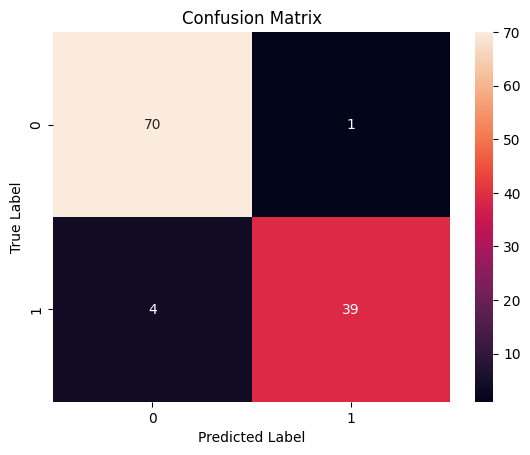

In [6]:

from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d')

plt.title('Confusion Matrix')  
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



### As we can see the model score without dimensionality reduction = 0.956

#### Now We are using Dimensionality reduction techniques one by one.

<h2 align = center> <font color = "#EE02A3">Principal Component Analysis</h2>

#### How it is work ?

PCA is an unsupervised machine learning algorithm that is used to reduce the dimensionality of a dataset. It aims to find the principal components (or directions) in the feature space that capture the most variance in the data. The principal components are orthogonal, meaning they are uncorrelated, and they are ordered in descending order of their explained variance. By projecting the original data onto the principal components, PCA reduces the dimensionality of the dataset while preserving as much information as possible.

#### When we should use it ?

PCA is useful when you have a high-dimensional dataset and you want to reduce the dimensionality to make it easier to visualize or analyze the data. It can also be used for feature selection by selecting the principal components that capture the most variance in the data. Additionally, PCA can be used for data compression by projecting the data onto the principal components.

#### Can we use Principal Components in our model training ?

Yes, PCA can be used in model training by projecting the original data onto the principal components. This allows you to reduce the dimensionality of the data and improve the performance of machine learning algorithms. However, it is important to note that the principal components selected by PCA may not always be the most relevant features for the model. It is always a good idea to perform feature selection before using PCA in your model training.

#### Why it is good idea to perform feature selection before ?

Feature selection helps improve the performance of machine learning algorithms by selecting the most relevant features that contribute to the prediction task. By reducing the dimensionality of the data, feature selection can make it easier to visualize and understand the data, and it can also help to improve the accuracy of the machine learning models. Additionally, feature selection can help to reduce the computational complexity of the models, making them more efficient and faster to train.

#### If i train my model with the Principal components , then how will i predict the new data ?

When you train your model with the principal components, you can use the principal components as the features for the model. To predict the new data, you can project the new data onto the principal components and use the trained model to make predictions. The predicted class or value for the new data will be the same as the predicted class or value for the original data projected onto the same principal components. 

#### It means the input should be the same as the original data ?

Yes, the input to your machine learning model should be the same as the original data. The principal components selected by PCA are orthogonal, meaning they are uncorrelated. By projecting the original data onto the principal components, you are effectively reducing the dimensionality of the data while preserving the relevant information. The principal components selected by PCA are the best features for the model, and the input to your machine learning model should be the original data projected onto the principal components.


### Implementation

In [10]:
components = []
modelScore = []

for i in range (1,len(X_train.columns)):
    pca = PCA(n_components=i , svd_solver='covariance_eigh')
    X_pca = pca.fit_transform(X)
    model_pca = LogisticRegression(max_iter=5000)
    model_pca.fit(X_pca, y.values.ravel())
    print(f"Model Score after PCA With Principle Components {i}: {model_pca.score(X_pca, y)}")
    components.append(i)
    modelScore.append(model_pca.score(X_pca, y))



Model Score after PCA With Principle Components 1: 0.9050966608084359
Model Score after PCA With Principle Components 2: 0.9332161687170475
Model Score after PCA With Principle Components 3: 0.9314586994727593
Model Score after PCA With Principle Components 4: 0.9525483304042179
Model Score after PCA With Principle Components 5: 0.9543057996485061
Model Score after PCA With Principle Components 6: 0.9543057996485061
Model Score after PCA With Principle Components 7: 0.9490333919156415
Model Score after PCA With Principle Components 8: 0.9507908611599297
Model Score after PCA With Principle Components 9: 0.9543057996485061
Model Score after PCA With Principle Components 10: 0.9543057996485061
Model Score after PCA With Principle Components 11: 0.9578207381370826
Model Score after PCA With Principle Components 12: 0.9578207381370826
Model Score after PCA With Principle Components 13: 0.9578207381370826
Model Score after PCA With Principle Components 14: 0.9578207381370826
Model Score aft

### Plotting

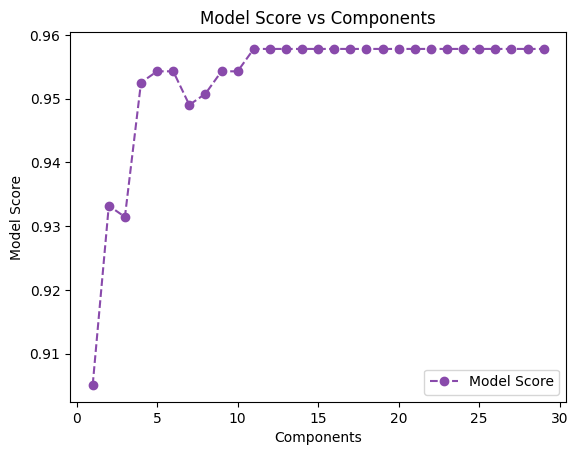

In [8]:
plt.plot(components , modelScore , marker = 'o' , linestyle = '--' ,label = 'Model Score',color = '#894AAB')

plt.title('Model Score vs Components')
plt.xlabel('Components')
plt.ylabel('Model Score')

plt.legend(loc='lower right')
plt.show()

### Interpretation 

As we can see in plot , after 10 components we have a straight line , which mean if we get only 11 components then our model give the same results as with the 30 dimensions which greatly improve performance and time complexity

### Plotting Best Model

c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


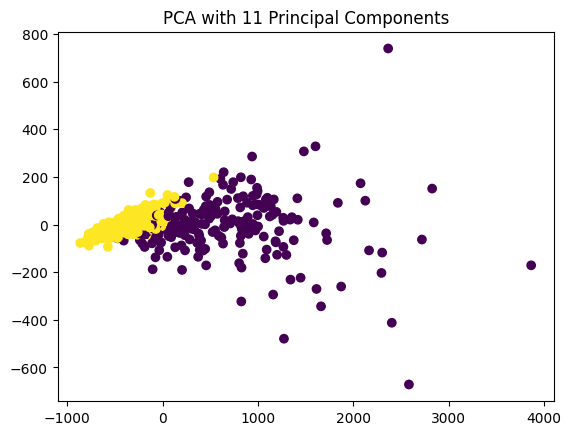

In [11]:
pca = PCA(n_components=11 , svd_solver='covariance_eigh')
X_pca = pca.fit_transform(X)
model_pca = LogisticRegression(max_iter=5000)
model_pca.fit(X_pca, y)



### Plotting

label_mapping = {'M': 0, 'B': 1}

y_pred = model_pca.predict(X_pca)
y_pred_numeric = np.array([label_mapping[label] for label in y_pred])

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_numeric)

plt.title('PCA with 11 Principal Components')
plt.show()





<h2 align = center> <font color = "#784AAF">Linear Discriminant Analysis (LDA)</h2>

#### How it is work ?

LDA is a supervised classification technique that aims to find the linear discriminants (or directions) in the feature space that maximize the separation between the classes. The discriminants are orthogonal, meaning they are uncorrelated, and they are ordered in descending order of their explained variance. By projecting the original data onto the discriminants, LDA reduces the dimensionality of the dataset while maintaining as much class separation as possible.


#### When we should use it ?


LDA is useful when you have a high-dimensional dataset and you want to reduce the dimensionality to make it easier to visualize or analyze the data. It can also be used for feature selection by selecting the discriminants that capture the most variance in the data. Additionally, LDA can be used for data compression by projecting the data onto the discriminants.

#### Can we use Linear Discriminant Analysis in our model training ?

Yes, LDA can be used in model training by projecting the original data onto the discriminants. This allows you to reduce the dimensionality of the data and improve the performance of machine learning algorithms. However, it is important to note that the discriminants selected by LDA may not always be the most relevant features for the model. It is always a good idea to perform feature selection before using LDA in your model training.


#### Difference between LDA and PCA ?

PCA and LDA both aim to reduce the dimensionality of a dataset while preserving as much information as possible. However, they have different approaches and objectives.

PCA is an unsupervised machine learning algorithm that finds the principal components (or directions) in the feature space that capture the most variance in the data. It aims to project the original data onto the principal components, reducing the dimensionality while preserving as much information as possible.

LDA is a supervised classification technique that finds the linear discriminants (or directions) in the feature space that maximize the separation between the classes. It aims to project the original data onto the discriminants, reducing the dimensionality while maintaining as much class separation as possible.

### Implementation

In [ ]:


lda = LinearDiscriminantAnalysis(n_components=1)

X_lda = lda.fit_transform(X, y)

model_lda = LogisticRegression(max_iter=5000)
model_lda.fit(X_lda, y)
print(f"Model Score after lda With Features {(X_lda.shape[1])}: {model_lda.score(X_lda, y)}")


Model Score after lda With Features 1: 0.9771528998242531


### Plotting



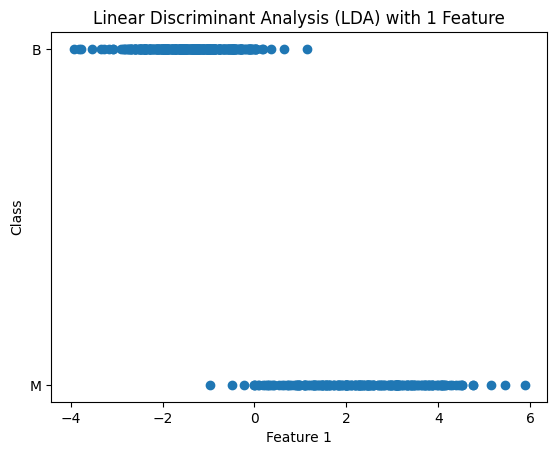

In [ ]:
plt.scatter(X_lda[:, 0], y)

plt.title('Linear Discriminant Analysis (LDA) with 1 Feature')

plt.xlabel('Feature 1')
plt.ylabel('Class')

plt.show()


#### Plotting Best Model


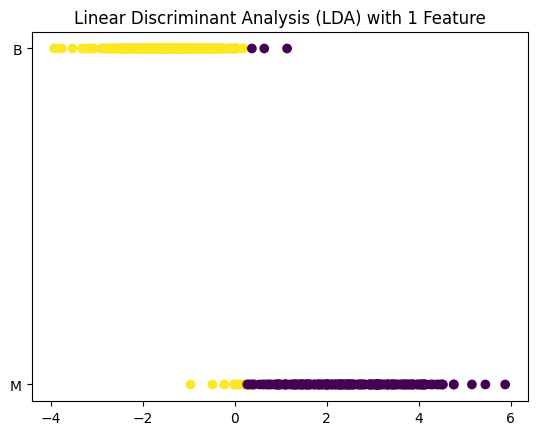

In [ ]:
### True vs predicted

### Converting y_pred categories to numeric 

label_mapping = {'M': 0, 'B': 1}


y_pred = model_lda.predict(X_lda)

y_pred_numeric = np.array([label_mapping[label] for label in y_pred])



plt.scatter(X_lda[:, 0], y, c=y_pred_numeric)

plt.title('Linear Discriminant Analysis (LDA) with 1 Feature')

plt.show()


### Interpretation

As we can see in the plot, LDA successfully separates the two classes using a single feature (Feature 1). The model mostly correctly predicts the class for each data point based on the feature value. This demonstrates that LDA can be a powerful tool for dimensionality reduction and classification in high-dimensional datasets. If we talk about in our case it is more efficient than PCA for classification in high-dimensional datasets.




<h2 align = center><font color = "#57ABCD">t-Distributed Stochastic Neighbor Embedding (t-SNE)</h2>



#### How it is work ?

t-SNE is a non-linear dimensionality reduction technique that aims to preserve the local structure and relationships in the high-dimensional data while reducing the dimensionality to two or three dimensions. The t-SNE algorithm calculates the similarity between data points in the high-dimensional space and projects them onto a lower-dimensional space using a probabilistic model. The goal is to create a mapping that preserves the local structure and relationships while reducing the dimensionality.

#### When we should use it ?

t-SNE is useful when you have a high-dimensional dataset and you want to visualize or analyze the data. It can also be used for feature selection by selecting the important features that contribute to the data structure. Additionally, t-SNE can be used for data compression by projecting the data onto a lower-dimensional space.

#### Can we use t-SNE in our model training ?

Yes, t-SNE can be used in model training by projecting the original data onto a lower-dimensional space using t-SNE. This allows you to reduce the dimensionality of the data while preserving as much information as possible. However, it is important to note that the t-SNE algorithm may not always provide the most meaningful results and may not always be the best choice for visualization or analysis.

#### Difference between t-SNE and PCA and LDA ?

t-SNE, PCA, and LDA all aim to reduce the dimensionality of a dataset while preserving as much information as possible. However, they have different approaches and objectives.

t-SNE is a non-linear dimensionality reduction technique that calculates the similarity between data points in the high-dimensional space and projects them onto a lower-dimensional space using a probabilistic model. It aims to create a mapping that preserves the local structure and relationships while reducing the dimensionality.

PCA is an unsupervised machine learning algorithm that finds the principal components (or directions) in the feature space that capture the most variance in the data. It aims to project the original data onto the principal components, reducing the dimensionality while preserving as much information as possible.

LDA is a supervised classification technique that finds the linear discriminants (or directions) in the feature space that maximize the separation between the classes. It aims to project the original data onto the discriminants, reducing the dimensionality while maintaining as much class separation as possible.


### Implementations

In [ ]:
features = []
modelScore = []

for i in range(1, len(X.columns)):
    tsne = TSNE(n_components=i , method='exact')

    X_tsne = tsne.fit_transform(X)

    model_tsne = LogisticRegression(max_iter=5000)
    model_tsne.fit(X_tsne, y)

    print(f"Model Score after t-SNE With Features {i}: {model_tsne.score(X_tsne, y)}")

    features.append(i)
    modelScore.append(model_tsne.score(X_tsne, y))




Model Score after t-SNE With Features 1: 0.8734622144112478
Model Score after t-SNE With Features 2: 0.9050966608084359
Model Score after t-SNE With Features 3: 0.9033391915641477
Model Score after t-SNE With Features 4: 0.9226713532513181
Model Score after t-SNE With Features 5: 0.9156414762741653
Model Score after t-SNE With Features 6: 0.9103690685413005
Model Score after t-SNE With Features 7: 0.9138840070298769
Model Score after t-SNE With Features 8: 0.9173989455184535
Model Score after t-SNE With Features 9: 0.9261862917398945
Model Score after t-SNE With Features 10: 0.929701230228471
Model Score after t-SNE With Features 11: 0.9226713532513181
Model Score after t-SNE With Features 12: 0.9191564147627417
Model Score after t-SNE With Features 13: 0.929701230228471
Model Score after t-SNE With Features 14: 0.9173989455184535
Model Score after t-SNE With Features 15: 0.9121265377855887
Model Score after t-SNE With Features 16: 0.9279437609841827
Model Score after t-SNE With Featur

### Plotting 


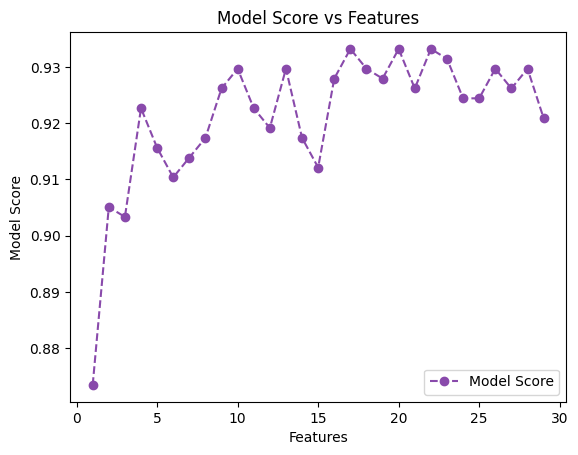

In [ ]:

plt.plot(features, modelScore, marker='o', linestyle='--', label='Model Score', color='#894AAB')

plt.title('Model Score vs Features')
plt.xlabel('Features')
plt.ylabel('Model Score')

plt.legend(loc='lower right')

plt.show()



### Interpretation 

As we can see in the plot, at 17 features , we have the best model score.

### Plotting Best Model 

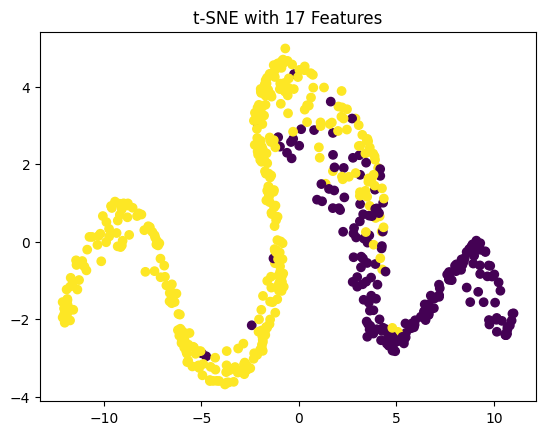

In [ ]:
# Model Training With Best no_of_components 
tsne = TSNE(n_components=17 , method='exact')
X_tsne = tsne.fit_transform(X)
model_tsne = LogisticRegression(max_iter=5000)
model_tsne.fit(X_tsne, y)

### Plotting

label_mapping = {'M': 0, 'B': 1}

y_pred = model_lda.predict(X_lda)
y_pred_numeric = np.array([label_mapping[label] for label in y_pred])

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_pred_numeric)

plt.title('t-SNE with 17 Features')
plt.show()





<h2 align =center> <font color = "#0A49BC">Independent Component Analysis (ICA)</h2>


#### How it is work ?

ICA is a non-linear dimensionality reduction technique that aims to separate the sources of variation in the high-dimensional data into independent components. ICA assumes that the data is generated by a linear combination of the original features and that the components are statistically independent. The goal is to create a mapping that preserves the original features while reducing the dimensionality.

#### When we should use it ?

ICA is useful when you have a high-dimensional dataset and you want to extract the most important features that contribute to the data structure. It can also be used for feature selection by selecting the important features that contribute to the data structure. Additionally, ICA can be used for data compression by projecting the data onto a lower-dimensional space.

#### Can we use ICA in our model training ?

Yes, ICA can be used in model training by projecting the original data onto a lower-dimensional space using ICA. This allows you to reduce the dimensionality of the data while preserving as much information as possible. However, it is important to note that the ICA algorithm may not always provide the most meaningful results and may not always be the best choice for visualization or analysis.

#### Difference between ICA and PCA and LDA ?

ICA is a non-linear dimensionality reduction technique that aims to separate the sources of variation in the high-dimensional data into independent components. ICA assumes that the data is generated by a linear combination of the original features and that the components are statistically independent.

PCA is an unsupervised machine learning algorithm that finds the principal components (or directions) in the feature space that capture the most variance in the data. It aims to project the original data onto the principal components, reducing the dimensionality while preserving as much information as possible.

LDA is a supervised classification technique that finds the linear discriminants (or directions) in the feature space that maximize the separation between the classes. It aims to project the original data onto the discriminants, reducing the dimensionality while maintaining as much class separation as possible.

### Implementation

In [ ]:
components = []
modelScore = []

for i in range(1, len(X.columns)-1):
    ica = FastICA(n_components=i)
    X_ica = ica.fit_transform(X)
    model_ica = LogisticRegression(max_iter=5000)
    model_ica.fit(X_ica, y)
    print(f"Model Score after ICA With Component Analysis {i}: {model_ica.score(X_ica, y)}")
    components.append(i)
    modelScore.append(model_ica.score(X_ica, y))






Model Score after ICA With Component Analysis 1: 0.9103690685413005
Model Score after ICA With Component Analysis 2: 0.9209138840070299
Model Score after ICA With Component Analysis 3: 0.9209138840070299
Model Score after ICA With Component Analysis 4: 0.9472759226713533
Model Score after ICA With Component Analysis 5: 0.9525483304042179
Model Score after ICA With Component Analysis 6: 0.9543057996485061
Model Score after ICA With Component Analysis 7: 0.9525483304042179
Model Score after ICA With Component Analysis 8: 0.9560632688927944
Model Score after ICA With Component Analysis 9: 0.9543057996485061
Model Score after ICA With Component Analysis 10: 0.9560632688927944
Model Score after ICA With Component Analysis 11: 0.961335676625659
Model Score after ICA With Component Analysis 12: 0.961335676625659
Model Score after ICA With Component Analysis 13: 0.9630931458699473
Model Score after ICA With Component Analysis 14: 0.9718804920913884
Model Score after ICA With Component Analysis

### Plotting

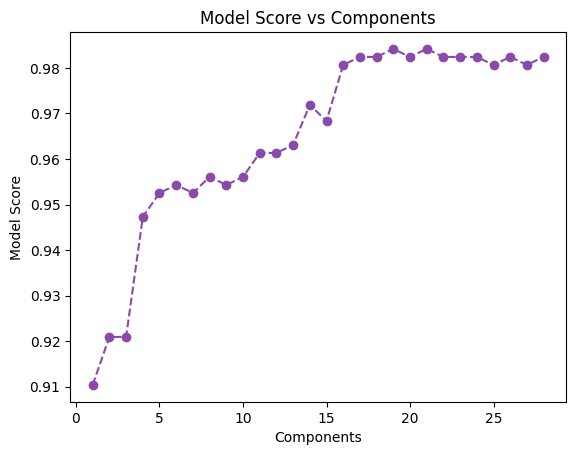

In [ ]:

plt.plot(components, modelScore, marker='o', linestyle='--', label='Model Score', color='#894AAB')

plt.title('Model Score vs Components')

plt.xlabel('Components')
plt.ylabel('Model Score')

plt.show()

### Interpretation

As we can see in the plot, at 19 components, we have the best model score.

### Plotting Best Model

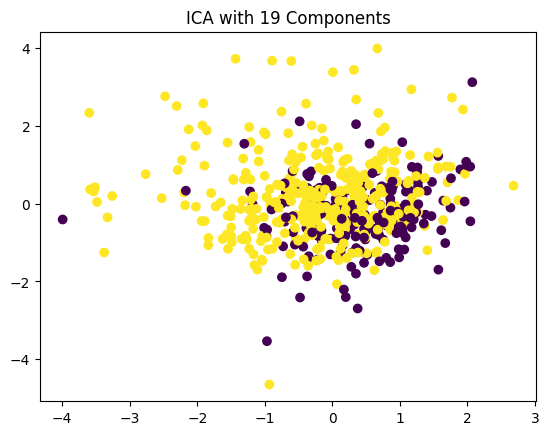

In [ ]:


# Model Training With Best no_of_components

ica = FastICA(n_components=19)
X_ica = ica.fit_transform(X)
model_ica = LogisticRegression(max_iter=5000)
model_ica.fit(X_ica, y)

### Plotting

label_mapping = {'M': 0, 'B': 1}

y_pred = model_ica.predict(X_ica)
y_pred_numeric = np.array([label_mapping[label] for label in y_pred])

plt.scatter(X_ica[:, 0], X_ica[:, 1], c=y_pred_numeric)

plt.title('ICA with 19 Components')

plt.show()


<h2 align = center> <font color = "#339911">Singular Value Decomposition</h2>


#### How it Works

SVD is a linear dimensionality reduction technique that decomposes a matrix into three component matrices: ( U ), (Sigma), and ( V^T )

The singular values in ( Sigma ) represent the importance or variance of each corresponding singular vector. By retaining only the top ( k ) singular values and their corresponding vectors, you can reduce the dimensionality of the data while preserving the most significant features.

#### When to Use It

SVD is useful when you need to reduce the dimensionality of your data for purposes such as noise reduction, data compression, or feature extraction. It is particularly effective for datasets where the data points lie close to a lower-dimensional subspace. SVD can also be used in natural language processing (NLP) for techniques such as Latent Semantic Analysis (LSA).

#### Can We Use SVD in Our Model Training?

Yes, SVD can be used in model training by reducing the dimensionality of the data before feeding it into a machine learning model. By projecting the original data onto a lower-dimensional space, SVD helps to reduce the computational complexity and can improve the performance of the model by eliminating redundant and noisy features.

#### Difference Between SVD, PCA, LDA, and ICA

- **SVD (Singular Value Decomposition)**:
  - Linear dimensionality reduction technique.
  - Decomposes data into orthogonal matrices representing the variance in the data.
  - Used for noise reduction, data compression, and feature extraction.

- **PCA (Principal Component Analysis)**:
  - Linear unsupervised dimensionality reduction technique.
  - Finds the principal components that capture the most variance in the data.
  - Projects the data onto these components, reducing dimensionality while preserving variance.

- **LDA (Linear Discriminant Analysis)**:
  - Linear supervised classification technique.
  - Finds linear discriminants that maximize class separation.
  - Projects data onto these discriminants, reducing dimensionality while maintaining class separation.

- **ICA (Independent Component Analysis)**:
  - Non-linear dimensionality reduction technique.
  - Assumes data is generated by a linear combination of independent sources.
  - Separates data into statistically independent components, useful for feature extraction and data compression.

In summary, SVD, PCA, LDA, and ICA are all dimensionality reduction techniques with different assumptions and applications. SVD and PCA are unsupervised and linear, with SVD being more general. LDA is supervised and focuses on class separation, while ICA is non-linear and aims for statistical independence of components.









### Implementation

In [ ]:
from sklearn.decomposition import TruncatedSVD

features = []
modelScores = []


for i in range(1 , len(X.columns)):
    svd = TruncatedSVD(n_components=i, algorithm='randomized')
    X_svd = svd.fit_transform(X)
    model_svd = LogisticRegression(max_iter=5000)
    model_svd.fit(X_svd, y)
    print(f"Model Score after SVD With Component Analysis {i}: {model_svd.score(X_svd, y)}")
    features.append(i)
    modelScores.append(model_svd.score(X_svd, y))







Model Score after SVD With Component Analysis 1: 0.9050966608084359
Model Score after SVD With Component Analysis 2: 0.929701230228471
Model Score after SVD With Component Analysis 3: 0.9261862917398945
Model Score after SVD With Component Analysis 4: 0.9578207381370826
Model Score after SVD With Component Analysis 5: 0.9525483304042179
Model Score after SVD With Component Analysis 6: 0.9543057996485061
Model Score after SVD With Component Analysis 7: 0.9507908611599297
Model Score after SVD With Component Analysis 8: 0.9507908611599297
Model Score after SVD With Component Analysis 9: 0.9543057996485061
Model Score after SVD With Component Analysis 10: 0.9543057996485061
Model Score after SVD With Component Analysis 11: 0.9578207381370826
Model Score after SVD With Component Analysis 12: 0.9578207381370826
Model Score after SVD With Component Analysis 13: 0.9578207381370826
Model Score after SVD With Component Analysis 14: 0.9578207381370826
Model Score after SVD With Component Analysi


### Plotting

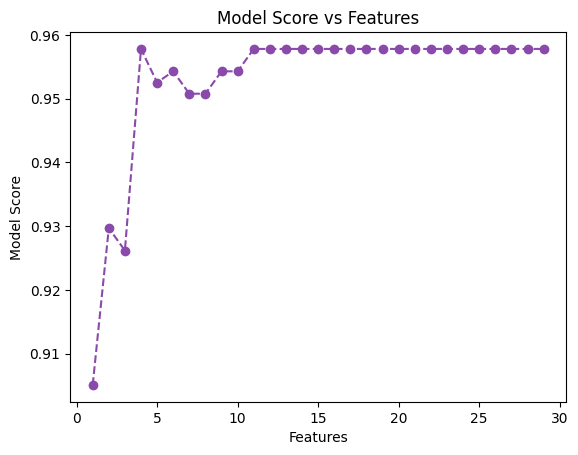

In [ ]:
plt.plot(features, modelScores, marker='o', linestyle='--', label='Model Score', color='#894AAB')

plt.title('Model Score vs Features')
plt.xlabel('Features')
plt.ylabel('Model Score')

plt.show()


### Interpretation

As we can see in the plot, at 11 features, we have the best model score. 

### Plotting Best Model

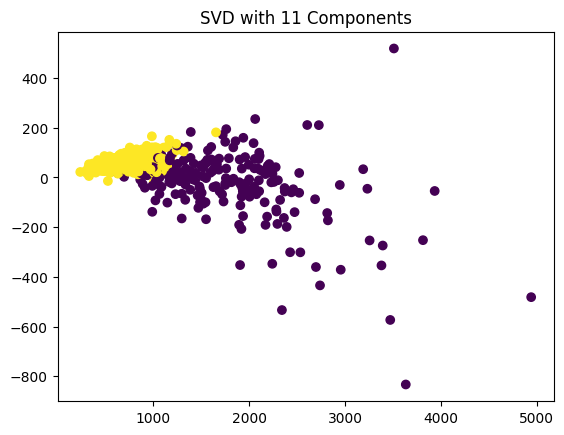

In [ ]:


# Model Training With Best no_of_components

svd = TruncatedSVD(n_components=11, algorithm='randomized')
X_svd = svd.fit_transform(X)
model_svd = LogisticRegression(max_iter=5000)
model_svd.fit(X_svd, y)

### Plotting

label_mapping = {'M': 0, 'B': 1}

y_pred = model_svd.predict(X_svd)
y_pred_numeric = np.array([label_mapping[label] for label in y_pred])

plt.scatter(X_svd[:, 0], X_svd[:, 1], c=y_pred_numeric)

plt.title('SVD with 11 Components')

plt.show()


<h2 align = center> <font color ="AA5200">Uniform Manifold Approximation and Projection(UMAP)</h2>



#### How it Works ?

UMAP (Uniform Manifold Approximation and Projection) is a dimensionality reduction technique that aims to preserve the local structure and relationships in the high-dimensional data while reducing the dimensionality to a lower-dimensional space. It was developed by Johnson, Neal, and Vassilvitskii in 2018.

The algorithm follows these steps:

1. Compute the distance matrix between all data points.

2. Build a k-nearest neighbor graph based on the distance matrix.

3. Compute the geodesic distance matrix between all data points using the k-nearest neighbor graph.

4. Apply the Hessian eigenvalue decomposition (HED) to the geodesic distance matrix to obtain the embedding coordinates.

#### When to Use It

UMAP is useful for visualizing high-dimensional data, reducing the dimensionality to a 2D or 3D space, and exploring patterns and relationships within the data. It can be used in various applications, such as data analysis, machine learning, and visualization.

#### Can We Use UMAP in Our Model Training?

Yes, UMAP can be used in model training by reducing the dimensionality of the data before feeding it into a machine learning model. By projecting the original data onto a lower-dimensional space using UMAP, you can improve the performance of the model by reducing the computational complexity and visualizing the data in a more meaningful way.



### Implementation

In [17]:


import umap

components=[]
scores = []

for i in range(1, len(X.columns)):
    umapper = umap.UMAP(n_components=i)
    X_umap = umapper.fit_transform(X)

    model_umap = LogisticRegression(max_iter=5000)
    model_umap.fit(X_umap,y )
    print(f"Model Score after UMAP With Components {i}: {model_umap.score(X_umap, y)}")
    components.append(i)
    scores.append(model_umap.score(X_umap, y))






Model Score after UMAP With Components 1: 0.9191564147627417
Model Score after UMAP With Components 2: 0.8892794376098418
Model Score after UMAP With Components 3: 0.9226713532513181
Model Score after UMAP With Components 4: 0.8998242530755711
Model Score after UMAP With Components 5: 0.9138840070298769
Model Score after UMAP With Components 6: 0.9244288224956063
Model Score after UMAP With Components 7: 0.9103690685413005
Model Score after UMAP With Components 8: 0.9121265377855887
Model Score after UMAP With Components 9: 0.9261862917398945
Model Score after UMAP With Components 10: 0.9173989455184535
Model Score after UMAP With Components 11: 0.9261862917398945
Model Score after UMAP With Components 12: 0.9033391915641477
Model Score after UMAP With Components 13: 0.9279437609841827
Model Score after UMAP With Components 14: 0.9209138840070299
Model Score after UMAP With Components 15: 0.9191564147627417
Model Score after UMAP With Components 16: 0.9173989455184535
Model Score after

### Plotting

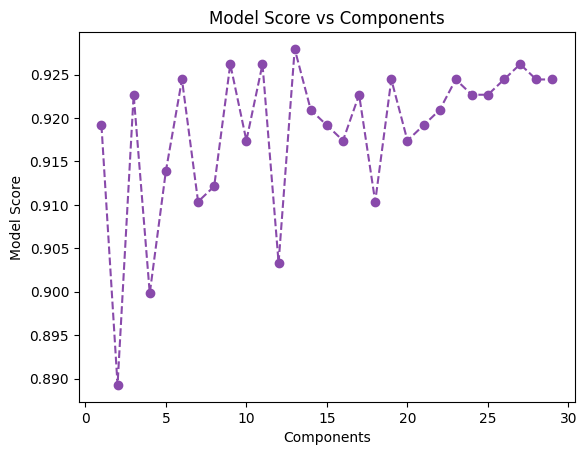

In [18]:


plt.plot(components, scores, marker='o', linestyle='--', label='Model Score', color='#894AAB')

plt.title('Model Score vs Components')
plt.xlabel('Components')
plt.ylabel('Model Score')

plt.show()

### Interpretation

As we can see in the plot, at 13 components, we have the best model score.

### Plotting Best Model

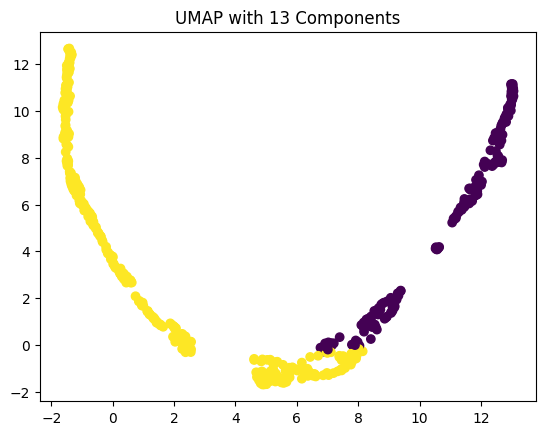

In [19]:


# Model Training With Best no_of_components

umapper = umap.UMAP(n_components=13)
X_umap = umapper.fit_transform(X)

model_umap = LogisticRegression(max_iter=5000)
model_umap.fit(X_umap, y)

### Plotting

label_mapping = {'M': 0, 'B': 1}

y_pred = model_umap.predict(X_umap)
y_pred_numeric = np.array([label_mapping[label] for label in y_pred])

plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_pred_numeric)

plt.title('UMAP with 13 Components')

plt.show()




<h2 align = center> <font color = "#FF0000">Recursive Feature Elimination (RFE)</h2>



#### How it Works ?

Recursive Feature Elimination (RFE) is a feature selection technique that works by recursively removing attributes and building a model on the remaining attributes until the desired number of features is reached. It uses a machine learning model to evaluate the importance of each feature and removes the least important features.

The algorithm follows these steps:

1. Choose a machine learning model and an evaluation metric.

2. Determine the number of features to select (n_features_to_select).

3. Fit the model on the original dataset and evaluate its performance.

4. Remove the least important feature and fit the model again. Evaluate its performance.

5. Repeat steps 3 and 4 until the desired number of features is reached.

#### When to Use It

RFE is useful for selecting the most relevant features in a dataset for machine learning models. It helps in reducing the dimensionality of the dataset and improving the performance of the models by focusing on the most important features.

#### Can We Use RFE in Our Model Training?

Yes, RFE can be used in model training by selecting the most relevant features using RFE and feeding them into a machine learning model. By selecting the most important features, you can improve the performance of the model by reducing the computational complexity and maintaining the most relevant information.



### Implementation

In [22]:
from sklearn.feature_selection import RFE

components=[]
scores = []
for i in range(1, len(X.columns)):

    rfe = RFE(estimator=LogisticRegression(max_iter=5000), n_features_to_select=i)
    X_rfe = rfe.fit_transform(X, y)
    model_rfe = LogisticRegression(max_iter=5000)
    model_rfe.fit(X_rfe, y)
    print(f"Model Score after RFE With Features {i}: {model_rfe.score(X_rfe, y)}")
    components.append(i)
    scores.append(model_rfe.score(X_rfe, y))



Model Score after RFE With Features 1: 0.8400702987697716
Model Score after RFE With Features 2: 0.836555360281195
Model Score after RFE With Features 3: 0.8312829525483304
Model Score after RFE With Features 4: 0.9437609841827768
Model Score after RFE With Features 5: 0.9543057996485061
Model Score after RFE With Features 6: 0.9543057996485061
Model Score after RFE With Features 7: 0.9525483304042179
Model Score after RFE With Features 8: 0.9525483304042179
Model Score after RFE With Features 9: 0.9525483304042179
Model Score after RFE With Features 10: 0.9525483304042179
Model Score after RFE With Features 11: 0.9560632688927944
Model Score after RFE With Features 12: 0.9560632688927944
Model Score after RFE With Features 13: 0.9560632688927944
Model Score after RFE With Features 14: 0.9578207381370826
Model Score after RFE With Features 15: 0.9578207381370826
Model Score after RFE With Features 16: 0.9560632688927944
Model Score after RFE With Features 17: 0.9578207381370826
Model S

### Plotting

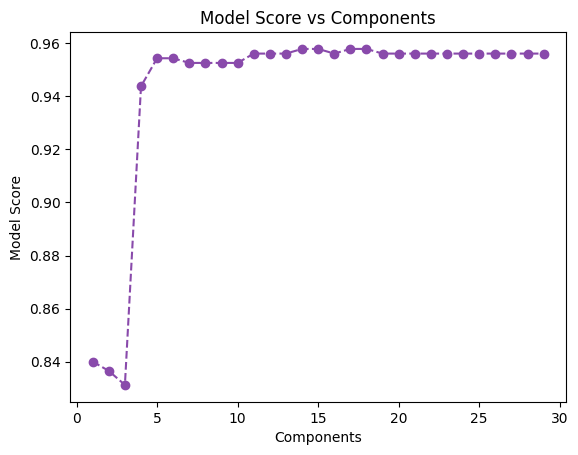

In [21]:


plt.plot(components, scores, marker='o', linestyle='--', label='Model Score', color='#894AAB')

plt.title('Model Score vs Components')
plt.xlabel('Components')
plt.ylabel('Model Score')

plt.show()

### Interpretation

As we can see in the plot, at 17 features, we have the best model score.

### Plotting Best Model


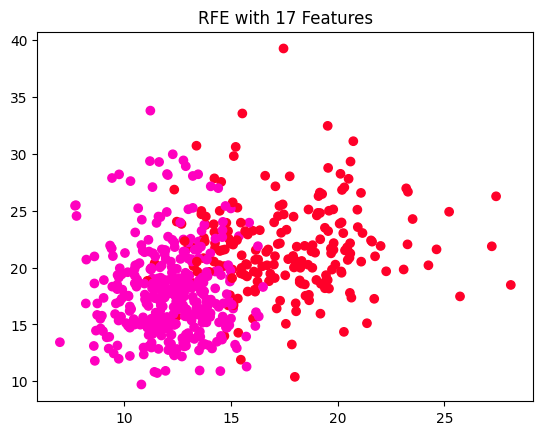

In [44]:

# Model Training With Best no_of_features

rfe = RFE(estimator=LogisticRegression(max_iter=5000), n_features_to_select=17)
X_rfe = rfe.fit_transform(X, y)
model_rfe = LogisticRegression(max_iter=5000)
model_rfe.fit(X_rfe, y)

### Plotting

label_mapping = {'M': 0, 'B': 1}

y_pred = model_rfe.predict(X_rfe)
y_pred_numeric = np.array([label_mapping[label] for label in y_pred])

plt.scatter(X_rfe[:, 0], X_rfe[:, 1], c=y_pred_numeric , cmap = "gist_rainbow")

plt.title('RFE with 17 Features')
plt.show()


<h2 align = center> <font color = "CC5090">Conclusion </h2>



In this analysis, we compared the performance of various dimensionality reduction techniques Principal Component Analysis (PCA),LDA ,Singular Value Decomposition (SVD), and Uniform Manifold Approximation and Projection (UMAP) and RFE on the breast cancer dataset.
